In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv('sinais_vitais_com_label_treino.txt', sep=',', header=0)
X = df.iloc[:, 2:6]
y = df.iloc[:, 6]

model1 = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=500)
model2 = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate_init=0.01, max_iter=500)
model3 = MLPRegressor(hidden_layer_sizes=(50, 50), activation='tanh', solver='adam', learning_rate_init=0.01, max_iter=500)
model5 = MLPRegressor(hidden_layer_sizes = (50, 50), activation = 'tanh', solver = 'adam', max_iter = 500, learning_rate_init = 0.007)  


best_model = None
best_rmse = None

models = [model1, model2, model3, model5]
for i, model in enumerate(models, start=1):
    model.fit(X, y)
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    print(f'Model {i} RMSE: {rmse}')
    if best_model is None or rmse < best_rmse:
            best_rmse = rmse
            best_model = model

print(f'Best model RMSE: {best_rmse}')

blind_test_data = pd.read_csv('sinais_vitais_validacao.txt', sep=',', header=0)
X_blind_test = blind_test_data.iloc[:, 2:6]

blind_test_predictions = best_model.predict(X_blind_test)

pd.DataFrame(blind_test_predictions).to_csv('predictions.csv', index=False, header=False)

Model 1 RMSE: 9.850918665034936
Model 2 RMSE: 15.794390345469383
Model 3 RMSE: 6.1321784573035325
Model 4 RMSE: 5.482095888344483
Best model RMSE: 5.482095888344483


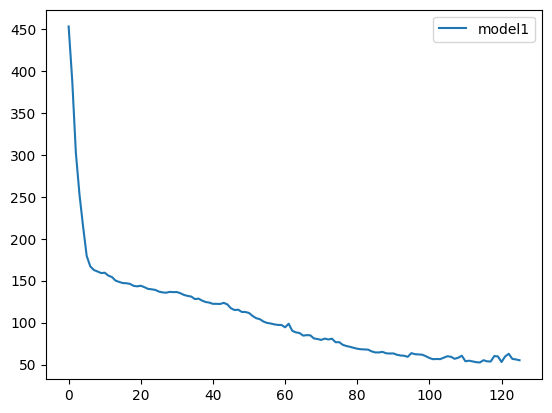

In [4]:
import matplotlib.pyplot as plt

plt.plot(model1.loss_curve_, label='model1')
plt.legend()
plt.show()

In [3]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model1, X, y, cv=5, scoring='neg_mean_squared_error')
print(scores)
print(np.sqrt(-scores))
print(np.mean(np.sqrt(-scores)))

[-106.08450393 -150.51554027 -124.03597632 -112.77010097 -112.70443965]
[10.2997332  12.2684775  11.13714399 10.61932677 10.61623472]
10.988183236307378


In [44]:
from sklearn.model_selection import cross_val_score

models = [model1, model2, model3, model5]
best_model = None
best_rmse = float('inf')

for i, model in enumerate(models, start=1):
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)
    print(f'Model {i} average RMSE: {avg_rmse}')
    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_model = model

print(f'Best model average RMSE: {best_rmse}')

Model 1 average RMSE: 11.61528137214648
Model 2 average RMSE: 16.01278556142103
Model 3 average RMSE: 11.046205198677152
Model 4 average RMSE: 8.677221693076033
Best model average RMSE: 8.677221693076033
